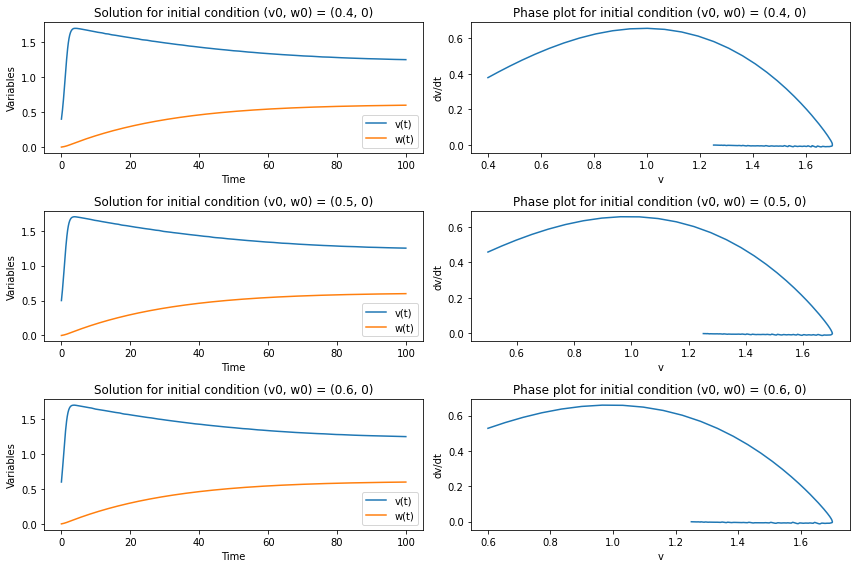

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры модели
a = 0.3
epsilon = 0.01
gamma = 2.5
I = 0

# Определение системы уравнений ФицХью-Нагумо
def fitzhugh_nagumo(t, y):
    v, w = y
    dv_dt = v - (v**3) / 3 - w + I
    dw_dt = epsilon * (v + a - gamma * w)
    return [dv_dt, dw_dt]

# Начальные условия
initial_conditions = [(0.4, 0), (0.5, 0), (0.6, 0)]
t_span = (0, 100)  # интервал времени
t_eval = np.linspace(*t_span, 1000)  # точки времени для вывода

# Решение системы для каждого начального условия
solutions = []
for v0, w0 in initial_conditions:
    sol = solve_ivp(fitzhugh_nagumo, t_span, [v0, w0], t_eval=t_eval, method='RK45')
    solutions.append(sol)

# Построение графиков
plt.figure(figsize=(12, 8))

# Графики v(t) и w(t) по времени
for i, sol in enumerate(solutions):
    plt.subplot(3, 2, 2*i + 1)
    plt.plot(sol.t, sol.y[0], label="v(t)")
    plt.plot(sol.t, sol.y[1], label="w(t)")
    plt.xlabel("Time")
    plt.ylabel("Variables")
    plt.title(f"Solution for initial condition (v0, w0) = {initial_conditions[i]}")
    plt.legend()

# Графики v vs dv/dt
for i, sol in enumerate(solutions):
    dv_dt = sol.y[0] - (sol.y[0]**3) / 3 - sol.y[1] + I
    plt.subplot(3, 2, 2*i + 2)
    plt.plot(sol.y[0], dv_dt)
    plt.xlabel("v")
    plt.ylabel("dv/dt")
    plt.title(f"Phase plot for initial condition (v0, w0) = {initial_conditions[i]}")

plt.tight_layout()
plt.show()